In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Importation des fichiers

In [4]:
ani = pd.read_csv("Fichiers CSV/Produits Animaux 2013.csv")
veg = pd.read_csv("Fichiers CSV/Produits Vegetaux 2013.csv")
pop = pd.read_csv("Fichiers CSV/Population 2012-2013.csv")

In [5]:
ani['origin'] = 'animal'
veg['origin'] = 'vegetal'

In [6]:
ani.head()

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,origin
0,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2731,Bovine Meat,2013,2013,1000 tonnes,134.00,S,Standardized data,animal
1,FBS,Food Balance Sheets,2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2013,2013,1000 tonnes,6.00,S,Standardized data,animal
2,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal
3,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal
4,FBS,Food Balance Sheets,2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2013,2013,kg,4.59,Fc,Calculated data,animal


In [7]:
temp = ani.append(veg)

del ani, veg

# On renomme les colonnes de temp
temp.columns = ["xx","xx2","country_code","country",'xx3','element'
    ,'item_code','item','xx4',"year","unit","value",'xx5','xx6'
    ,'origin']

# Transformation de temp en table pivot
data = temp.pivot_table(
    index=["country_code","country","item_code","item","year","origin"],
    columns = ["element"], values=["value"], aggfunc=sum)
# On renomme les colonnes (attention l'ordre peut changer selon vos données !)
data.columns = ['domestic_supply_quantity', 'export_quantity', 'fat_supply_quantity_(g/capita/day)',
    'feed', "food", 
    "food_supply_(kcal/capita/day)", 'food_supply_quantity_(kg/capita/yr)', 'import_quantity',
    'losses', 'other_uses', "processing",'production', 
    'protein_supply_quantity_(g/capita/day)', 'seed', 'stock_variation']
    
data = data.reset_index()
data.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_(g/capita/day),feed,...,food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),import_quantity,losses,other_uses,processing,production,protein_supply_quantity_(g/capita/day),seed,stock_variation
0,1,Armenia,2511,Wheat and products,2013,vegetal,554.0,1.0,3.60,93.0,...,1024.0,130.60,361.0,32.0,0.0,10.0,312.0,30.52,30.0,-118.0
1,1,Armenia,2513,Barley and products,2013,vegetal,198.0,0.0,0.00,137.0,...,0.0,0.00,9.0,15.0,26.0,7.0,189.0,0.00,14.0,0.0
2,1,Armenia,2514,Maize and products,2013,vegetal,102.0,NaN,NaN,96.0,...,0.0,0.03,82.0,7.0,NaN,NaN,21.0,0.01,0.0,NaN
3,1,Armenia,2515,Rye and products,2013,vegetal,1.0,NaN,0.00,1.0,...,1.0,0.12,0.0,0.0,NaN,NaN,1.0,0.02,0.0,0.0
4,1,Armenia,2516,Oats,2013,vegetal,6.0,NaN,0.03,4.0,...,2.0,0.37,1.0,0.0,NaN,NaN,5.0,0.09,0.0,NaN


In [8]:
data.shape

(15702, 21)

## Retrait de Chine

In [15]:
data = data[data.country != 'China']

In [16]:
pop = pop[pop.Country != 'China']
pop_2012 = pop[pop.Year == 2012]
pop_2013 = pop[pop.Year == 2013]

In [17]:
pop_2012.reset_index(inplace=True)
pop_2013.reset_index(inplace=True)

pop_2012.drop('index', axis=1, inplace=True)
pop_2013.drop('index', axis=1, inplace=True)

/Users/adrickcassim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Création des 4 variables du dataset final

In [18]:
echantillon_temp = pd.concat([pop_2012.Country, pop_2012.Value * 1000, pop_2013.Value * 1000], axis=1)

In [19]:
echantillon_temp.columns = ["Country", "Population 2012", "Population 2013"]

In [20]:
echantillon_temp["Evo population %"] = ((echantillon_temp["Population 2013"] - echantillon_temp["Population 2012"]) / echantillon_temp["Population 2012"]) * 100

In [21]:
echantillon_temp.head()

,Country,Population 2012,Population 2013,Evo population %
0,Afghanistan,29825000,30552000,2.437552
1,Albania,3162000,3173000,0.347881
2,Algeria,38482000,39208000,1.886596
3,Angola,20821000,21472000,3.126651
4,Antigua and Barbuda,89000,90000,1.123596


In [22]:
prot_by_country = data.groupby(['country', 'origin'])['protein_supply_quantity_(g/capita/day)'].sum()

In [23]:
prot_by_country = prot_by_country.unstack()
prot_by_country.head()

origin,animal,vegetal
country,,
Afghanistan,12.21,46.05
Albania,59.41,51.96
Algeria,24.98,66.94
Angola,18.40,38.87
Antigua and Barbuda,56.83,26.66


In [24]:
prot_by_country.reset_index(inplace=True)
prot_by_country['animal_total'] = prot_by_country.animal * pop_2013.Value * (365/1000)
prot_by_country['vegetal_total'] = prot_by_country.vegetal * pop_2013.Value * (365/1000)
prot_by_country.head()

origin,country,animal,vegetal,animal_total,vegetal_total
0,Afghanistan,12.21,46.05,136159.57080,513525.6540
1,Albania,59.41,51.96,68805.39445,60177.2142
2,Algeria,24.98,66.94,357486.78160,957972.9848
3,Angola,18.40,38.87,144205.95200,304635.0736
4,Antigua and Barbuda,56.83,26.66,1866.86550,875.7810


In [25]:
echantillon_temp = pd.concat([echantillon_temp, prot_by_country.animal, prot_by_country.vegetal, prot_by_country.animal_total, prot_by_country.vegetal_total], axis = 1)

In [26]:
echantillon_temp.rename(columns = {'animal' : 'Animal protein supply quantity (g/capita/day)', 'vegetal' : 'Vegetal protein supply quantity (g/capita/day)', 'animal_total' : 'Animal protein supply quantity (kg)', 'vegetal_total' : 'Vegetal protein supply quantity (kg)'}, inplace=True)
echantillon_temp.head()

,Country,Population 2012,Population 2013,Evo population %,Animal protein supply quantity (g/capita/day),Vegetal protein supply quantity (g/capita/day),Animal protein supply quantity (kg),Vegetal protein supply quantity (kg)
0,Afghanistan,29825000,30552000,2.437552,12.21,46.05,136159.57080,513525.6540
1,Albania,3162000,3173000,0.347881,59.41,51.96,68805.39445,60177.2142
2,Algeria,38482000,39208000,1.886596,24.98,66.94,357486.78160,957972.9848
3,Angola,20821000,21472000,3.126651,18.40,38.87,144205.95200,304635.0736
4,Antigua and Barbuda,89000,90000,1.123596,56.83,26.66,1866.86550,875.7810


In [27]:
echantillon_temp['Ratio Animal protein / Total protein'] = echantillon_temp['Animal protein supply quantity (kg)'] / (echantillon_temp['Animal protein supply quantity (kg)'] + echantillon_temp['Vegetal protein supply quantity (kg)'])
echantillon_temp.head()

,Country,Population 2012,Population 2013,Evo population %,Animal protein supply quantity (g/capita/day),Vegetal protein supply quantity (g/capita/day),Animal protein supply quantity (kg),Vegetal protein supply quantity (kg),Ratio Animal protein / Total protein
0,Afghanistan,29825000,30552000,2.437552,12.21,46.05,136159.57080,513525.6540,0.209578
1,Albania,3162000,3173000,0.347881,59.41,51.96,68805.39445,60177.2142,0.533447
2,Algeria,38482000,39208000,1.886596,24.98,66.94,357486.78160,957972.9848,0.271758
3,Angola,20821000,21472000,3.126651,18.40,38.87,144205.95200,304635.0736,0.321285
4,Antigua and Barbuda,89000,90000,1.123596,56.83,26.66,1866.86550,875.7810,0.680680


In [28]:
kcal_by_country = data.groupby('country')['food_supply_(kcal/capita/day)'].sum()
kcal_by_country = kcal_by_country.reset_index()
kcal_by_country.head()

,country,food_supply_(kcal/capita/day)
0,Afghanistan,2087.0
1,Albania,3188.0
2,Algeria,3293.0
3,Angola,2474.0
4,Antigua and Barbuda,2416.0


In [29]:
echantillon_temp['Food supply (kcal/capita/day)'] = kcal_by_country['food_supply_(kcal/capita/day)']
echantillon_temp.head()

,Country,Population 2012,Population 2013,Evo population %,Animal protein supply quantity (g/capita/day),Vegetal protein supply quantity (g/capita/day),Animal protein supply quantity (kg),Vegetal protein supply quantity (kg),Ratio Animal protein / Total protein,Food supply (kcal/capita/day)
0,Afghanistan,29825000,30552000,2.437552,12.21,46.05,136159.57080,513525.6540,0.209578,2087.0
1,Albania,3162000,3173000,0.347881,59.41,51.96,68805.39445,60177.2142,0.533447,3188.0
2,Algeria,38482000,39208000,1.886596,24.98,66.94,357486.78160,957972.9848,0.271758,3293.0
3,Angola,20821000,21472000,3.126651,18.40,38.87,144205.95200,304635.0736,0.321285,2474.0
4,Antigua and Barbuda,89000,90000,1.123596,56.83,26.66,1866.86550,875.7810,0.680680,2416.0


In [30]:
col = echantillon_temp['Animal protein supply quantity (g/capita/day)'] + echantillon_temp['Vegetal protein supply quantity (g/capita/day)']
echantillon_temp.insert(loc=6, column = 'Total protein supply (g/capita/day)', value = col)

In [31]:
echantillon_temp.head()

,Country,Population 2012,Population 2013,Evo population %,Animal protein supply quantity (g/capita/day),Vegetal protein supply quantity (g/capita/day),Total protein supply (g/capita/day),Animal protein supply quantity (kg),Vegetal protein supply quantity (kg),Ratio Animal protein / Total protein,Food supply (kcal/capita/day)
0,Afghanistan,29825000,30552000,2.437552,12.21,46.05,58.26,136159.57080,513525.6540,0.209578,2087.0
1,Albania,3162000,3173000,0.347881,59.41,51.96,111.37,68805.39445,60177.2142,0.533447,3188.0
2,Algeria,38482000,39208000,1.886596,24.98,66.94,91.92,357486.78160,957972.9848,0.271758,3293.0
3,Angola,20821000,21472000,3.126651,18.40,38.87,57.27,144205.95200,304635.0736,0.321285,2474.0
4,Antigua and Barbuda,89000,90000,1.123596,56.83,26.66,83.49,1866.86550,875.7810,0.680680,2416.0


In [32]:
echantillon = echantillon_temp[['Country', 'Evo population %', 'Ratio Animal protein / Total protein', 'Total protein supply (g/capita/day)', 'Food supply (kcal/capita/day)']]
echantillon.head()

,Country,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day)
0,Afghanistan,2.437552,0.209578,58.26,2087.0
1,Albania,0.347881,0.533447,111.37,3188.0
2,Algeria,1.886596,0.271758,91.92,3293.0
3,Angola,3.126651,0.321285,57.27,2474.0
4,Antigua and Barbuda,1.123596,0.680680,83.49,2416.0


## Retrait d'Oman

In [33]:
# Oman, outlier trop significatif sur les données, on le retire
# Solde migratoire très important (73%) de la croissance de la population, 
# contre 27% dû au solde naturel
echantillon = echantillon[echantillon['Country'] != 'Oman']

## Dendrogramme et découpage en clusters

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(echantillon.iloc[:, 1:5], method='ward')

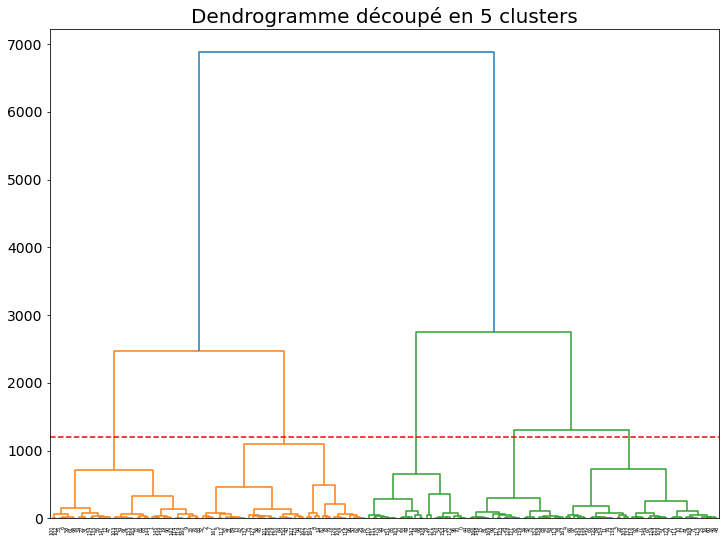

In [35]:
plt.figure(figsize=(12,9))
dendrogram = dendrogram(Z)
x = [0, 1800]
y = [1200, 1200]
plt.plot(x, y, linestyle='dashed', c='r')
plt.yticks(fontsize=14)
plt.title('Dendrogramme découpé en 5 clusters', fontsize=20)
plt.savefig('Dendrogramme')
plt.show()

In [36]:
# Caractériser les groupes et chercher leurs particularités

In [37]:
clusters = fcluster(Z, 5, criterion='maxclust')

In [38]:
echantillon['Cluster'] = clusters
echantillon.head()

,Country,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day),Cluster
0,Afghanistan,2.437552,0.209578,58.26,2087.0,3
1,Albania,0.347881,0.533447,111.37,3188.0,1
2,Algeria,1.886596,0.271758,91.92,3293.0,2
3,Angola,3.126651,0.321285,57.27,2474.0,5
4,Antigua and Barbuda,1.123596,0.680680,83.49,2416.0,5


In [39]:
echantillon [['Country', 'Cluster']]

,Country,Cluster
0,Afghanistan,3
1,Albania,1
2,Algeria,2
3,Angola,5
4,Antigua and Barbuda,5
...,...,...
169,Venezuela (Bolivarian Republic of),5
170,Viet Nam,4
171,Yemen,3
172,Zambia,3


In [40]:
echantillon[['Country', 'Cluster']].set_index('Country').to_csv('Groupes de pays')

In [41]:
clus1 = echantillon[echantillon['Cluster']==1]
clus2 = echantillon[echantillon['Cluster']==2]
clus3 = echantillon[echantillon['Cluster']==3]
clus4 = echantillon[echantillon['Cluster']==4]
clus5 = echantillon[echantillon['Cluster']==5]

In [42]:
clus3['Country']

0                                Afghanistan
18          Bolivia (Plurinational State of)
20                                  Botswana
29                  Central African Republic
30                                      Chad
37                                     Congo
44     Democratic People's Republic of Korea
49                                   Ecuador
53                                  Ethiopia
54                                      Fiji
68                                    Guyana
70                                  Honduras
85                                  Kiribati
93                                 Lithuania
96                                    Malawi
108                                  Myanmar
110                                    Nepal
132                              Saint Lucia
148                                 Eswatini
152                                 Thailand
154                              Timor-Leste
160                                   Uganda
164       

In [43]:
echantillon[echantillon['Cluster'] == 1].describe()

,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day),Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,1.172097,0.485517,87.538974,3033.358974,1.0
std,1.043263,0.109884,9.427719,95.221483,0.0
min,-0.639139,0.254441,64.570000,2875.000000,1.0
25%,0.327710,0.413486,82.450000,2943.000000,1.0
50%,1.044804,0.513634,87.580000,3042.000000,1.0
75%,1.771596,0.562804,92.360000,3112.500000,1.0
max,3.765870,0.658820,111.370000,3188.000000,1.0


In [44]:
centr1 = np.mean(clus1.iloc[:,1:-1]).values
centr2 = np.mean(clus2.iloc[:,1:-1]).values
centr3 = np.mean(clus3.iloc[:,1:-1]).values
centr4 = np.mean(clus4.iloc[:,1:-1]).values
centr5 = np.mean(clus5.iloc[:,1:-1]).values

In [45]:
pd.DataFrame([centr1, centr2, centr3, centr4, centr5], index=['Centroid 1', 'Centroid 2', 'Centroid 3', 'Centroid 4', 'Centroid 5'], columns = echantillon.iloc[:, 1:-1].columns)

,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day)
Centroid 1,1.172097,0.485517,87.538974,3033.358974
Centroid 2,1.026484,0.540780,105.765349,3419.813953
Centroid 3,1.749104,0.270278,55.654231,2173.576923
Centroid 4,1.286281,0.430924,77.627200,2769.920000
Centroid 5,1.361795,0.350424,67.953500,2534.550000


## Etude des boxplots

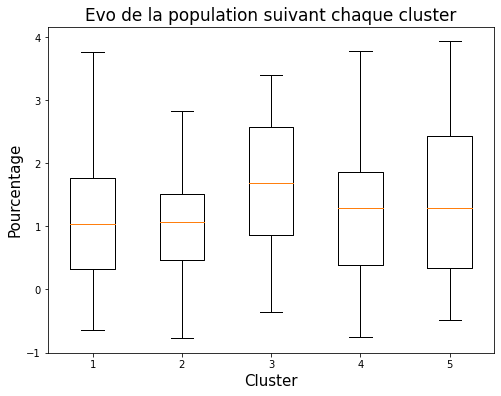

In [46]:
plt.figure(figsize = (8,6))
plt.boxplot([echantillon[echantillon['Cluster'] == 1].iloc[:,1], 
            echantillon[echantillon['Cluster'] == 2].iloc[:,1],
            echantillon[echantillon['Cluster'] == 3].iloc[:,1],
            echantillon[echantillon['Cluster'] == 4].iloc[:,1],
            echantillon[echantillon['Cluster'] == 5].iloc[:,1]])
plt.title('Evo de la population suivant chaque cluster', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Pourcentage', fontsize = 15)
plt.show()

In [47]:
# Pays à forte évolution démographique
echantillon[(echantillon['Cluster'] == 1) & (echantillon['Evo population %'] > 8)]

,Country,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day),Cluster


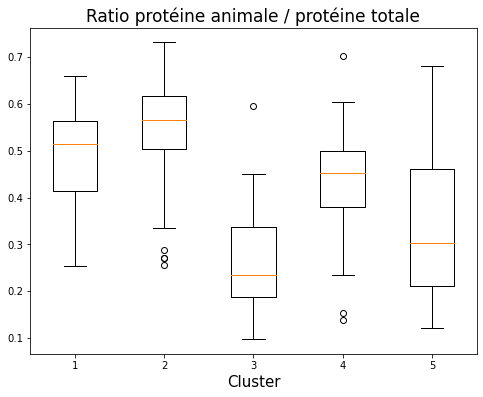

In [48]:
plt.figure(figsize = (8,6))
plt.boxplot([echantillon[echantillon['Cluster'] == 1].iloc[:,2], 
            echantillon[echantillon['Cluster'] == 2].iloc[:,2],
            echantillon[echantillon['Cluster'] == 3].iloc[:,2],
            echantillon[echantillon['Cluster'] == 4].iloc[:,2],
            echantillon[echantillon['Cluster'] == 5].iloc[:,2]])
plt.title('Ratio protéine animale / protéine totale', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.show()

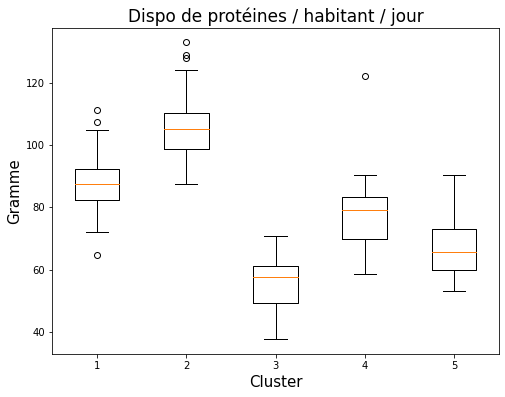

In [49]:
plt.figure(figsize = (8,6))
plt.boxplot([echantillon[echantillon['Cluster'] == 1].iloc[:,3], 
            echantillon[echantillon['Cluster'] == 2].iloc[:,3],
            echantillon[echantillon['Cluster'] == 3].iloc[:,3],
            echantillon[echantillon['Cluster'] == 4].iloc[:,3],
            echantillon[echantillon['Cluster'] == 5].iloc[:,3]])
plt.title('Dispo de protéines / habitant / jour', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Gramme', fontsize = 15)
plt.show()

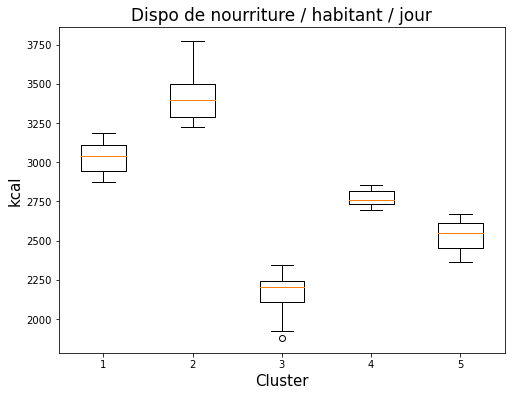

In [50]:
plt.figure(figsize = (8,6))
plt.boxplot([echantillon[echantillon['Cluster'] == 1].iloc[:,4], 
            echantillon[echantillon['Cluster'] == 2].iloc[:,4],
            echantillon[echantillon['Cluster'] == 3].iloc[:,4],
            echantillon[echantillon['Cluster'] == 4].iloc[:,4],
            echantillon[echantillon['Cluster'] == 5].iloc[:,4]])
plt.title('Dispo de nourriture / habitant / jour', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('kcal', fontsize = 15)
plt.show()

In [51]:
# Cluster 1 : Habitude alimentaire riche, aliments d'origine animale présents (CANDIDAT 2)
# Cluster 2 : Habitude alimentaire très riche, aliments d'origine animale très présents (CANDIDAT 1)
# Cluster 3 : Habitude alimentaire très faible, aliments d'origine animale rares, forte évolution démographique
# Cluster 4 : Habitude alimentaire modérée, aliments d'origine animale modérément présents
# Cluster 5 : Habitude alimentaire faible, répartition des aliments d'origine animale inégale

In [52]:
# Liste des pays à cibler (cluster 2)
echantillon[echantillon['Cluster'] == 2]['Country']

2                       Algeria
5                     Argentina
7                     Australia
8                       Austria
13                      Belarus
14                      Belgium
21                       Brazil
28                       Canada
32         China, Hong Kong SAR
40                      Croatia
42                       Cyprus
45                      Denmark
50                        Egypt
52                      Estonia
56                       France
57             French Polynesia
62                        Ghana
64                      Grenada
73                        India
78                       Israel
79                        Italy
80                      Jamaica
84                        Kenya
87                   Kyrgyzstan
94                   Luxembourg
95                   Madagascar
101                  Mauritania
106                     Morocco
107                  Mozambique
112               New Caledonia
119                    Pakistan
126     

In [53]:
clus2.head()

,Country,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day),Cluster
2,Algeria,1.886596,0.271758,91.92,3293.0,2
5,Argentina,0.873756,0.652339,102.60,3226.0,2
7,Australia,1.271150,0.674666,106.26,3278.0,2
8,Austria,0.366257,0.591902,106.20,3770.0,2
13,Belarus,-0.510367,0.585946,93.78,3249.0,2


## Découpage du cluster 2

In [54]:
# On redécoupe en 5 groupes le cluster 2 afin de cibler les meilleurs pays de la liste
Z2 = linkage(clus2.iloc[:, 1:5], method='ward')
clusters2 = fcluster(Z2, 4, criterion='maxclust')
clus2['Cluster 2'] = clusters2
clus2.head()

<ipython-input-54-75f5b597edd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus2['Cluster 2'] = clusters2


,Country,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day),Cluster,Cluster 2
2,Algeria,1.886596,0.271758,91.92,3293.0,2,1
5,Argentina,0.873756,0.652339,102.60,3226.0,2,1
7,Australia,1.271150,0.674666,106.26,3278.0,2,1
8,Austria,0.366257,0.591902,106.20,3770.0,2,3
13,Belarus,-0.510367,0.585946,93.78,3249.0,2,1


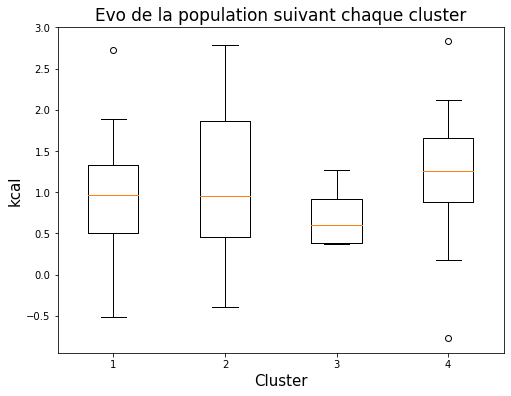

In [55]:
plt.figure(figsize = (8,6))
plt.boxplot([clus2[clus2['Cluster 2'] == 1].iloc[:,1], 
            clus2[clus2['Cluster 2'] == 2].iloc[:,1],
            clus2[clus2['Cluster 2'] == 3].iloc[:,1],
            clus2[clus2['Cluster 2'] == 4].iloc[:,1]])
plt.title('Evo de la population suivant chaque cluster', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('kcal', fontsize = 15)
plt.show()

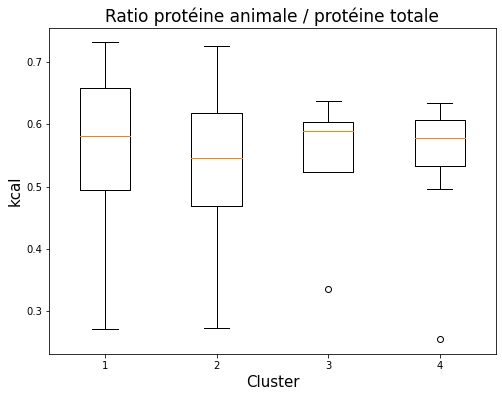

In [56]:
plt.figure(figsize = (8,6))
plt.boxplot([clus2[clus2['Cluster 2'] == 1].iloc[:,2], 
            clus2[clus2['Cluster 2'] == 2].iloc[:,2],
            clus2[clus2['Cluster 2'] == 3].iloc[:,2],
            clus2[clus2['Cluster 2'] == 4].iloc[:,2]])
plt.title('Ratio protéine animale / protéine totale', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('kcal', fontsize = 15)
plt.show()

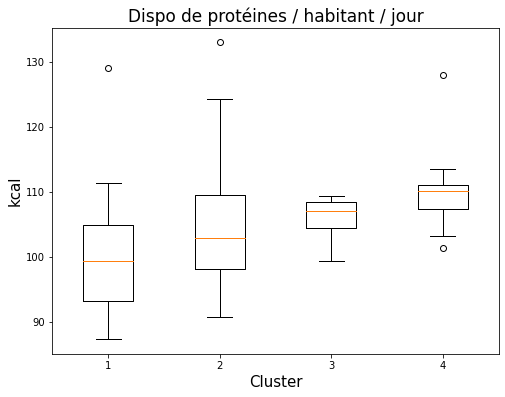

In [57]:
plt.figure(figsize = (8,6))
plt.boxplot([clus2[clus2['Cluster 2'] == 1].iloc[:,3], 
            clus2[clus2['Cluster 2'] == 2].iloc[:,3],
            clus2[clus2['Cluster 2'] == 3].iloc[:,3],
            clus2[clus2['Cluster 2'] == 4].iloc[:,3]])
plt.title('Dispo de protéines / habitant / jour', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('kcal', fontsize = 15)
plt.show()

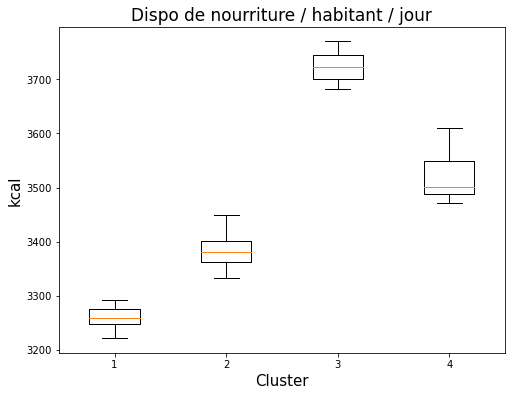

In [58]:
plt.figure(figsize = (8,6))
plt.boxplot([clus2[clus2['Cluster 2'] == 1].iloc[:,4], 
            clus2[clus2['Cluster 2'] == 2].iloc[:,4],
            clus2[clus2['Cluster 2'] == 3].iloc[:,4],
            clus2[clus2['Cluster 2'] == 4].iloc[:,4]])
plt.title('Dispo de nourriture / habitant / jour', fontsize = 17)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('kcal', fontsize = 15)
plt.show()

In [59]:
echantillon.head()

,Country,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day),Cluster
0,Afghanistan,2.437552,0.209578,58.26,2087.0,3
1,Albania,0.347881,0.533447,111.37,3188.0,1
2,Algeria,1.886596,0.271758,91.92,3293.0,2
3,Angola,3.126651,0.321285,57.27,2474.0,5
4,Antigua and Barbuda,1.123596,0.680680,83.49,2416.0,5


## ACP

In [60]:
ech_country = echantillon.set_index('Country').iloc[:,:4]
n = ech_country.shape[0]
p = ech_country.shape[1]

In [61]:
ech_country.head()

,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day)
Country,,,,
Afghanistan,2.437552,0.209578,58.26,2087.0
Albania,0.347881,0.533447,111.37,3188.0
Algeria,1.886596,0.271758,91.92,3293.0
Angola,3.126651,0.321285,57.27,2474.0
Antigua and Barbuda,1.123596,0.680680,83.49,2416.0


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ech_norm = sc.fit_transform(ech_country)

In [63]:
ech_norm

array([[ 1.08006557e+00, -1.35087962e+00, -1.15494459e+00,
        -1.73278940e+00],
       [-8.74760992e-01,  6.54177771e-01,  1.50543415e+00,
         7.78143655e-01],
       [ 5.64662241e-01, -9.65924774e-01,  5.31147457e-01,
         1.01760594e+00],
       [ 1.72469720e+00, -6.59305240e-01, -1.20453553e+00,
        -8.50199852e-01],
       [-1.49102778e-01,  1.56569087e+00,  1.08873068e-01,
        -9.82474254e-01],
       [-3.82820640e-01,  1.39023241e+00,  1.06612853e+00,
         8.64806194e-01],
       [-9.48130058e-01,  3.24059779e-01,  4.37976595e-01,
         1.76067064e-01],
       [-1.10701563e-02,  1.52845600e+00,  1.24946474e+00,
         9.83397038e-01],
       [-8.57570779e-01,  1.01606953e+00,  1.24645923e+00,
         2.10544887e+00],
       [-1.55087074e-01, -6.48324935e-01,  5.90756771e-01,
         6.07099169e-01],
       [ 5.71596691e-02,  1.40707903e+00,  2.42618337e-01,
        -4.03203595e-01],
       [-5.12265483e-02, -1.54782544e+00, -1.27516505e+00,
      

In [64]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver = 'full')

In [65]:
coord = acp.fit_transform(ech_norm)

In [66]:
# Coordonnées des 4 composantes
acp.components_

array([[-0.19431656,  0.52264251,  0.59692941,  0.57685454],
       [ 0.97848937,  0.1199384 ,  0.15753864,  0.05792159],
       [ 0.03356673, -0.82141904,  0.22452022,  0.52319663],
       [-0.06060448, -0.19424304,  0.75395459, -0.62461925]])

In [67]:
# Variance liée à chaque axe
var_axes = acp.singular_values_**2/n
var_axes

array([2.51209685, 0.94446297, 0.43911727, 0.1043229 ])

In [68]:
# Variance en % liée à chaque axe
ratio_var = acp.explained_variance_ratio_
ratio_var

array([0.62802421, 0.23611574, 0.10977932, 0.02608073])

In [69]:
# Les deux premiers axes récupèrent près de 85 % de la variance totale

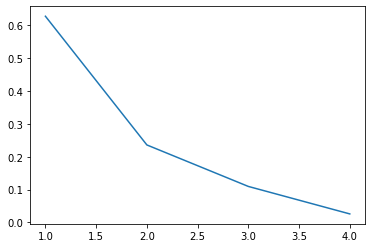

In [70]:
plt.plot(np.arange(1, p+1), ratio_var)

In [71]:
# Méthode du coude, on choisit les deux premiers axes

In [72]:
clus1.Country.iloc[2]

'Azerbaijan'

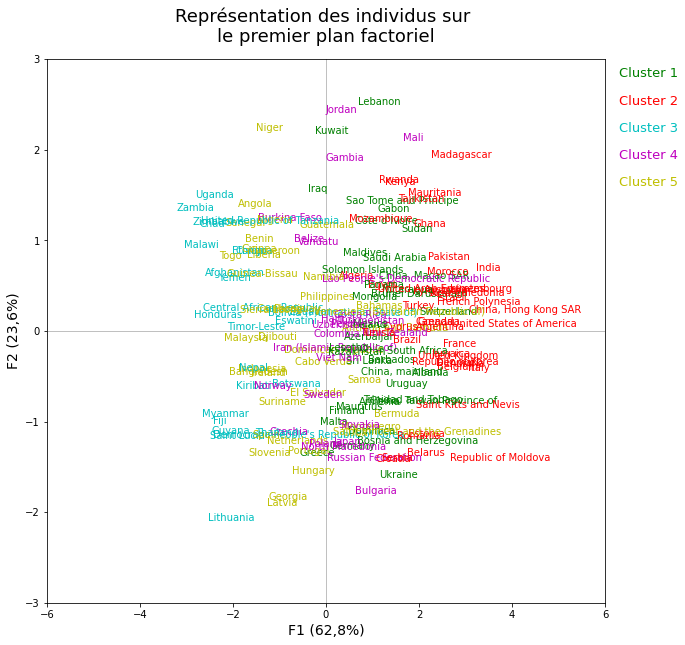

In [73]:
# Affichage des individus par rapport aux deux composantes principales
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-6,6)
axes.set_ylim(-3,3)

colors = ['g', 'r', 'c', 'm', 'y']

coord1 =[]
coord2 =[]
coord3 =[]
coord4 =[]
coord5 =[]


coordc1 =[]
coordc2 =[]
coordc3 =[]
coordc4 =[]
coordc5 =[]

for i in range(n):
    
    if ech_country.index[i] in clus1.Country.values:
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), c=colors[0])
        coord1.append((coord[i,0], coord[i,1]))
        coordc1.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    elif ech_country.index[i] in clus2.Country.values:
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), c=colors[1])
        coord2.append((coord[i,0], coord[i,1]))
        coordc2.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    elif ech_country.index[i] in clus3.Country.values:
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), c=colors[2])
        coord3.append((coord[i,0], coord[i,1]))
        coordc3.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    elif ech_country.index[i] in clus4.Country.values:
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), c=colors[3])
        coord4.append((coord[i,0], coord[i,1]))
        coordc4.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    elif ech_country.index[i] in clus5.Country.values:
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), c=colors[4])
        coord5.append((coord[i,0], coord[i,1]))
        coordc5.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
        
        
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-3,3],color='silver',linestyle='-',linewidth=1)
plt.text(6.3, 2.8, 'Cluster 1', c='g', fontsize=13)
plt.text(6.3, 2.5, 'Cluster 2', c='r', fontsize=13)
plt.text(6.3, 2.2, 'Cluster 3', c='c', fontsize=13)
plt.text(6.3, 1.9, 'Cluster 4', c='m', fontsize=13)
plt.text(6.3, 1.6, 'Cluster 5', c='y', fontsize=13)

plt.xlabel('F1 (62,8%)', fontsize=14)
plt.ylabel('F2 (23,6%)', fontsize=14)
plt.title('Représentation des individus sur \nle premier plan factoriel', fontsize=18, y=1.02)
plt.savefig('Représentation individus ACP')

plt.show()

In [74]:
coord1 = np.array(coord1)
coord2 = np.array(coord2)
coord3 = np.array(coord3)
coord4 = np.array(coord4)
coord5 = np.array(coord5)

centroid1_fact = np.average(coord1, axis=0)
centroid2_fact = np.average(coord2, axis=0)
centroid3_fact = np.average(coord3, axis=0)
centroid4_fact = np.average(coord4, axis=0)
centroid5_fact = np.average(coord5, axis=0)

In [75]:
centroid1_fact

array([0.63846636, 0.01511961])

In [76]:
x_centroids = [centroid1_fact[0], centroid2_fact[0], centroid3_fact[0], centroid4_fact[0], centroid5_fact[0]]
y_centroids = [centroid1_fact[1], centroid2_fact[1], centroid3_fact[1], centroid4_fact[1], centroid5_fact[1]]

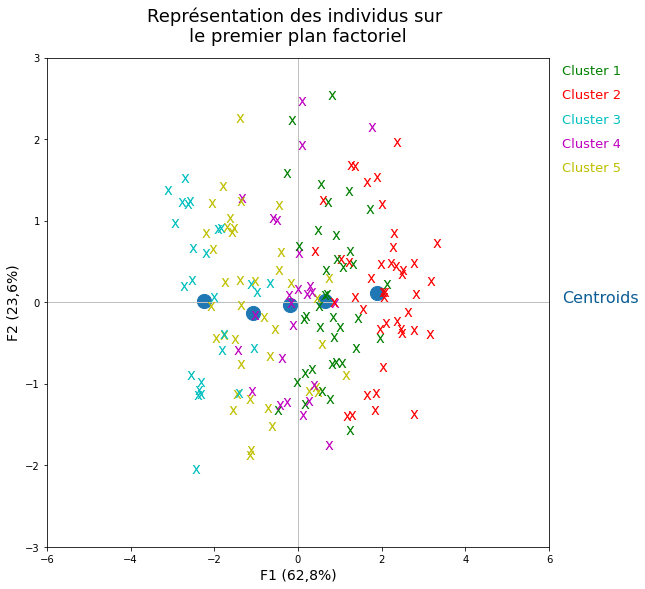

In [77]:
fig, axes = plt.subplots(figsize=(9,9))
axes.set_xlim(-6,6)
axes.set_ylim(-3,3)

for i in range(n):
    if ech_country.index[i] in clus1.Country.values:
        plt.annotate('x', (coord[i,0], coord[i,1]), c=colors[0], fontsize=15)
    elif ech_country.index[i] in clus2.Country.values:
        plt.annotate('x', (coord[i,0], coord[i,1]), c=colors[1], fontsize=15)
    elif ech_country.index[i] in clus3.Country.values:
        plt.annotate('x', (coord[i,0], coord[i,1]), c=colors[2], fontsize=15)
    elif ech_country.index[i] in clus4.Country.values:
        plt.annotate('x', (coord[i,0], coord[i,1]), c=colors[3], fontsize=15)
    elif ech_country.index[i] in clus5.Country.values:
        plt.annotate('x', (coord[i,0], coord[i,1]), c=colors[4], fontsize=15)

plt.scatter(x_centroids, y_centroids, s=200)

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-3,3],color='silver',linestyle='-',linewidth=1)
plt.text(6.3, 2.8, 'Cluster 1', c='g', fontsize=13)
plt.text(6.3, 2.5, 'Cluster 2', c='r', fontsize=13)
plt.text(6.3, 2.2, 'Cluster 3', c='c', fontsize=13)
plt.text(6.3, 1.9, 'Cluster 4', c='m', fontsize=13)
plt.text(6.3, 1.6, 'Cluster 5', c='y', fontsize=13)
plt.text(6.3, 0, 'Centroids', c='#0b5d97', fontsize=16)

plt.xlabel('F1 (62,8%)', fontsize=14)
plt.ylabel('F2 (23,6%)', fontsize=14)
plt.title('Représentation des individus sur \nle premier plan factoriel', fontsize=18, y=1.02)

plt.show()

In [78]:
cor_var = np.zeros((p,p))

for k in range(p):
    cor_var[:,k] = acp.components_[k,:] * np.sqrt(var_axes[k])

print(cor_var)

[[-0.30798389  0.95093007  0.0222433  -0.01957468]
 [ 0.82836724  0.11656031 -0.54432092 -0.06273867]
 [ 0.94610899  0.15310154  0.1487804   0.24352022]
 [ 0.91429113  0.05629022  0.34670108 -0.20174612]]


In [79]:
cor_var[:, 0:2]

array([[-0.30798389,  0.95093007],
       [ 0.82836724,  0.11656031],
       [ 0.94610899,  0.15310154],
       [ 0.91429113,  0.05629022]])

In [80]:
ech_country.columns

Index(['Evo population %', 'Ratio Animal protein / Total protein',
       'Total protein supply (g/capita/day)', 'Food supply (kcal/capita/day)'],
      dtype='object')

In [81]:
ech_renamed = ech_country.rename(columns = {'Evo population %' : 'evo', 
                                  'Ratio Animal protein / Total protein' : 'ratio',
                                  'Total protein supply (g/capita/day)' : 'prot',
                                  'Food supply (kcal/capita/day)' : 'food'})

In [82]:
ech_renamed

,evo,ratio,prot,food
Country,,,,
Afghanistan,2.437552,0.209578,58.26,2087.0
Albania,0.347881,0.533447,111.37,3188.0
Algeria,1.886596,0.271758,91.92,3293.0
Angola,3.126651,0.321285,57.27,2474.0
Antigua and Barbuda,1.123596,0.680680,83.49,2416.0
...,...,...,...,...
Venezuela (Bolivarian Republic of),1.502253,0.522615,72.96,2633.0
Viet Nam,0.973611,0.380468,81.61,2744.0
Yemen,2.326849,0.235144,58.90,2217.0


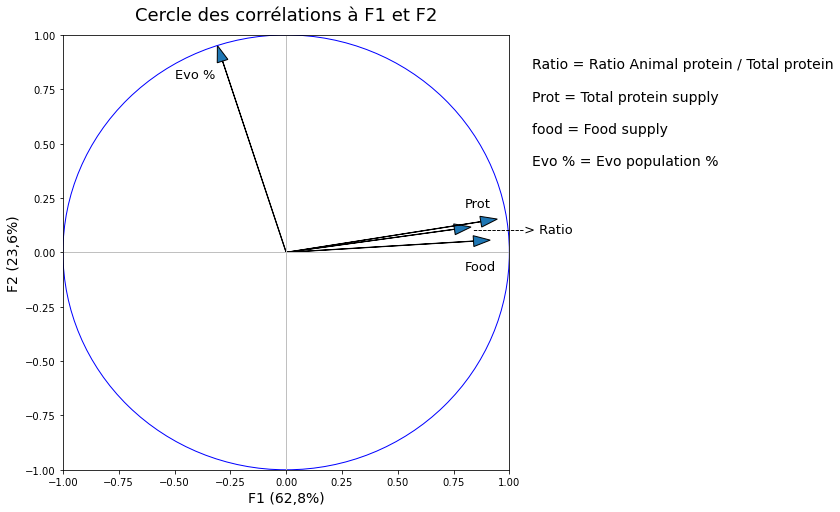

In [83]:
origin = np.array([0,0])

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.arrow(0,0, cor_var[j,0],cor_var[j,1], length_includes_head=True, head_width=0.05)
    
plt.text(-0.5, 0.8, 'Evo %', fontsize=13)
plt.text(0.8, 0.21, 'Prot', fontsize=13)
plt.text(0.8, 0.09, '  -----------> Ratio', fontsize=13)
plt.text(0.8, -0.08, 'Food', fontsize=13)
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
    
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.xlabel('F1 (62,8%)', fontsize=14)
plt.ylabel('F2 (23,6%)', fontsize=14)
plt.text(1.1, 0.4, 'Ratio = Ratio Animal protein / Total protein\n\nProt = Total protein supply\n\nfood = Food supply\n\nEvo % = Evo population %', fontsize=14)
plt.title('Cercle des corrélations à F1 et F2', fontsize=18, y=1.02)
plt.savefig('Cercle des corrélations')
plt.show()

In [84]:
# F1 est caractérisé par les 3 autres variables (prot > food > ratio)
# F2 est caractérisé par l'évolution de la population

## Focus sur le cluster 2 sur le nuage des individus dans le plan factoriel

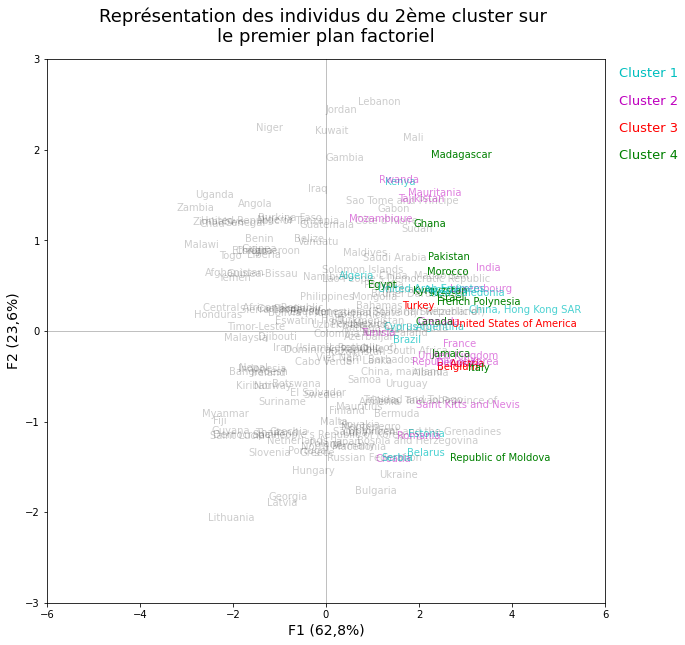

In [85]:
# Affichage des individus par rapport aux deux composantes principales
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-6,6)
axes.set_ylim(-3,3)

coord_clus2_1 =[]
coord_clus2_2 =[]
coord_clus2_3 =[]
coord_clus2_4 =[]


for i in range(n):
    
    if ech_country.index[i] in clus2[clus2['Cluster 2'] == 1].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='c', alpha = 0.7)
        coord_clus2_1.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    elif ech_country.index[i] in clus2[clus2['Cluster 2'] == 2].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='m', alpha=0.5)
        coord_clus2_2.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    elif ech_country.index[i] in clus2[clus2['Cluster 2'] == 3].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='r')
        coord_clus2_3.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    elif ech_country.index[i] in clus2[clus2['Cluster 2'] == 4].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='g')
        coord_clus2_4.append((coord[i,0], coord[i,1], coord[i,2], coord[i,3]))
    else :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), alpha=0.2)



plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-3,3],color='silver',linestyle='-',linewidth=1)


plt.xlabel('F1 (62,8%)', fontsize=14)
plt.ylabel('F2 (23,6%)', fontsize=14)

plt.text(6.3, 2.8, 'Cluster 1', c='c', fontsize=13)
plt.text(6.3, 2.5, 'Cluster 2', c='m', fontsize=13)
plt.text(6.3, 2.2, 'Cluster 3', c='r', fontsize=13)
plt.text(6.3, 1.9, 'Cluster 4', c='g', fontsize=13)

plt.title('Représentation des individus du 2ème cluster sur \nle premier plan factoriel', fontsize=18, y=1.02)
plt.savefig('Représentation du cluster 2')

plt.show()

In [86]:
coord_clus2_1_cent = np.average(coord_clus2_1, axis=0)
coord_clus2_2_cent = np.average(coord_clus2_2, axis=0)
coord_clus2_3_cent = np.average(coord_clus2_3, axis=0)
coord_clus2_4_cent = np.average(coord_clus2_4, axis=0)

x_clus2_cent = [coord_clus2_1_cent[0], coord_clus2_2_cent[0], coord_clus2_3_cent[0], coord_clus2_4_cent[0]]
y_clus2_cent = [coord_clus2_1_cent[1], coord_clus2_2_cent[1], coord_clus2_3_cent[1], coord_clus2_4_cent[1]]

In [87]:
coord_clus2_1_cent

array([ 1.61689172, -0.0365995 ,  0.05306008,  0.02836347])

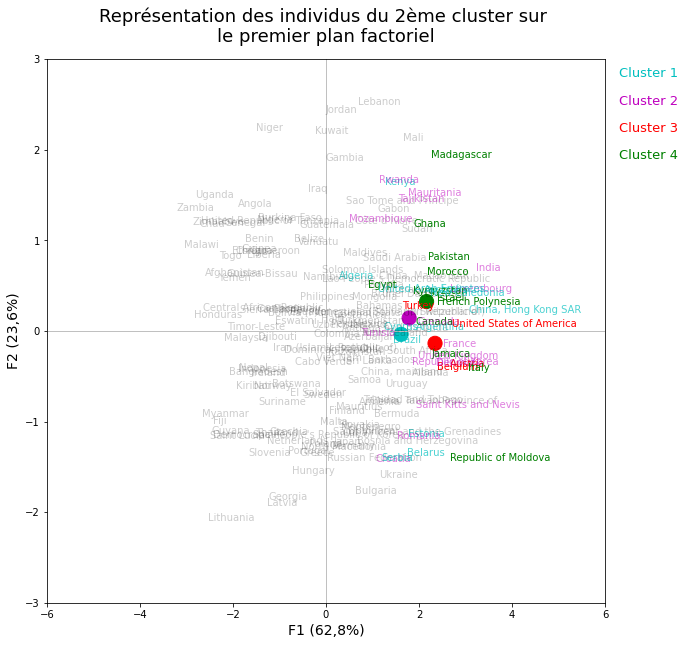

In [88]:
# Affichage des individus par rapport aux deux composantes principales
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-6,6)
axes.set_ylim(-3,3)


for i in range(n):
    
    if ech_country.index[i] in clus2[clus2['Cluster 2'] == 1].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='c', alpha = 0.7)
    elif ech_country.index[i] in clus2[clus2['Cluster 2'] == 2].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='m', alpha=0.5)
    elif ech_country.index[i] in clus2[clus2['Cluster 2'] == 3].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='r')
    elif ech_country.index[i] in clus2[clus2['Cluster 2'] == 4].Country.values :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), color='g')
    else :
        plt.annotate(ech_country.index[i], (coord[i,0], coord[i,1]), alpha=0.2)

plt.scatter(x_clus2_cent, y_clus2_cent, c=['c', 'm', 'r', 'g'], s=200)

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-3,3],color='silver',linestyle='-',linewidth=1)


plt.xlabel('F1 (62,8%)', fontsize=14)
plt.ylabel('F2 (23,6%)', fontsize=14)

plt.text(6.3, 2.8, 'Cluster 1', c='c', fontsize=13)
plt.text(6.3, 2.5, 'Cluster 2', c='m', fontsize=13)
plt.text(6.3, 2.2, 'Cluster 3', c='r', fontsize=13)
plt.text(6.3, 1.9, 'Cluster 4', c='g', fontsize=13)

plt.title('Représentation des individus du 2ème cluster sur \nle premier plan factoriel', fontsize=18, y=1.02)
plt.savefig('Représentation du cluster 2')

plt.show()

In [89]:
clus2[clus2['Cluster 2'] == 4].Country.values

array(['Canada', 'Egypt', 'French Polynesia', 'Ghana', 'Israel', 'Italy',
       'Jamaica', 'Kyrgyzstan', 'Madagascar', 'Morocco', 'Pakistan',
       'Republic of Moldova'], dtype=object)

In [90]:
df_centr = pd.DataFrame([coord_clus2_1_cent, coord_clus2_2_cent, coord_clus2_3_cent, coord_clus2_4_cent], columns = ['F1', 'F2', 'F3', 'F4'], index = ['Centroid 1', 'Centroid 2', 'Centroid 3', 'Centroid 4'])
df_centr

,F1,F2,F3,F4
Centroid 1,1.616892,-0.036599,0.053060,0.028363
Centroid 2,1.788687,0.143018,0.430792,0.062644
Centroid 3,2.345642,-0.136090,0.745591,-0.425554
Centroid 4,2.163483,0.325121,0.507220,-0.015882


In [91]:
df_centr.to_csv('Coordonnées centroïds')

# Tests

In [92]:
echantillon.head()

,Country,Evo population %,Ratio Animal protein / Total protein,Total protein supply (g/capita/day),Food supply (kcal/capita/day),Cluster
0,Afghanistan,2.437552,0.209578,58.26,2087.0,3
1,Albania,0.347881,0.533447,111.37,3188.0,1
2,Algeria,1.886596,0.271758,91.92,3293.0,2
3,Angola,3.126651,0.321285,57.27,2474.0,5
4,Antigua and Barbuda,1.123596,0.680680,83.49,2416.0,5


# Test de Kolmogorov-Smirnov sur Evo population
## H0 : Evo population suit une loi normale

In [93]:
from scipy.stats import kstest, shapiro
XNormed_1 = (echantillon['Evo population %'].values - np.mean(echantillon['Evo population %'].values, axis=0))/np.std(echantillon['Evo population %'].values, axis=0)
kstest(XNormed_1, 'norm')

KstestResult(statistic=0.06907051146478316, pvalue=0.3644711875477581)

## H0 : Ratio Animal protein / Total protein suit une loi normale

In [95]:
XNormed_2 = (echantillon['Ratio Animal protein / Total protein'].values - np.mean(echantillon['Ratio Animal protein / Total protein'].values, axis=0))/np.std(echantillon['Ratio Animal protein / Total protein'].values, axis=0)
kstest(XNormed_2, 'norm')

KstestResult(statistic=0.09536406916811613, pvalue=0.08049308423831547)

## H0 :  Total protein supply suit une loi normale

In [96]:
XNormed_3 = (echantillon['Total protein supply (g/capita/day)'].values - np.mean(echantillon['Total protein supply (g/capita/day)'].values, axis=0))/np.std(echantillon['Total protein supply (g/capita/day)'].values, axis=0)
kstest(XNormed_3, 'norm')

KstestResult(statistic=0.0854821432671854, pvalue=0.1505449674786975)

## H0 : Food supply suit une loi normale

In [97]:
XNormed_4 = (echantillon['Food supply (kcal/capita/day)'].values - np.mean(echantillon['Food supply (kcal/capita/day)'].values, axis=0))/np.std(echantillon['Food supply (kcal/capita/day)'].values, axis=0)
kstest(XNormed_4, 'norm')

KstestResult(statistic=0.05689295619893475, pvalue=0.6093950240362977)

In [98]:
# On ne rejette pas l'hypothèse H0 pour un niveau de test de 5%

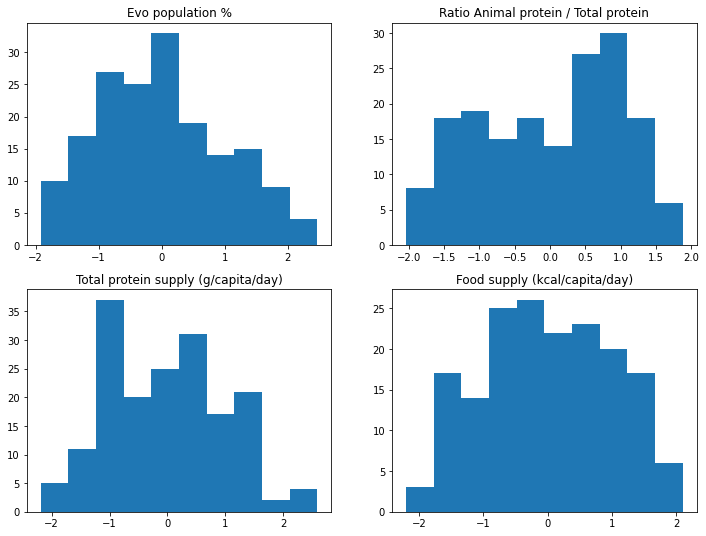

In [99]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))
axs[0, 0].hist(XNormed_1)
axs[0, 0].set_title('Evo population %')
axs[0, 1].hist(XNormed_2)
axs[0, 1].set_title('Ratio Animal protein / Total protein')
axs[1, 0].hist(XNormed_3)
axs[1, 0].set_title('Total protein supply (g/capita/day)')
axs[1, 1].hist(XNormed_4)
axs[1, 1].set_title('Food supply (kcal/capita/day)')
plt.show()

## La variable "Food supply" suit une loi normale. On la choisit pour la suite.

# Test gaussien

## Test sur les deux premiers clusters du df echantillon initial 

## H0 : var_clus3 = var_clus4

In [100]:
X2 = clus2[clus2['Cluster 2'] == 3]['Food supply (kcal/capita/day)']
X3 = clus2[clus2['Cluster 2'] == 4]['Food supply (kcal/capita/day)']

from scipy.stats import f
f_distrib = f(len(X2) - 1, len(X3) - 1)
f_stat = np.var(X2, ddof=1) / np.var(X3, ddof=1)
p_value = 2 * min(f_distrib.cdf(f_stat), 1 - f_distrib.cdf(f_stat))

In [101]:
p_value

0.7609431026882255

In [102]:
# On ne rejette l'hypothèse H0

## H0 : mean_clus3 = mean_clus4

In [103]:
from scipy.stats import ttest_ind
ttest_ind(X2, X3, equal_var = True)

Ttest_indResult(statistic=7.533005096140473, pvalue=2.738427334878355e-06)

In [104]:
# On rejette l'hypothèse H0

## Les deux groupes suivent bien deux lois différentes